In [ ]:
import pandas as pd

In [ ]:
ins_df = pd.read_csv('insurance.csv')

In [ ]:
ins_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
ins_df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [ ]:
ins_df['sex'] = ins_df['sex'].astype(pd.CategoricalDtype())
ins_df['smoker'] = ins_df['smoker'].astype(pd.CategoricalDtype())
ins_df['region'] = ins_df['region'].astype(pd.CategoricalDtype())

In [ ]:
ins_df.dtypes

,0
age,int64
sex,category
bmi,float64
children,int64
smoker,category
region,category
charges,float64


In [ ]:
ins_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
ins_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
ins_df.isnull().any().any()

np.False_

In [ ]:
ins_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
ins_df[['age','bmi','children','charges']].median()

,0
age,39.000
bmi,30.400
children,1.000
charges,9382.033


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

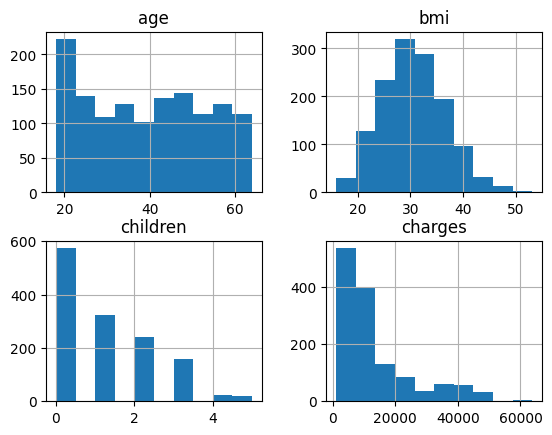

In [ ]:
ins_df.hist()

In [ ]:
mean_by_smoking = ins_df.groupby('smoker')['age'].mean()

/tmp/ipython-input-2733245362.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_smoking = ins_df.groupby('smoker')['age'].mean()


In [ ]:
mean_by_smoking

,age
smoker,
no,39.385338
yes,38.514599


In [ ]:
mean_by_gender_smoker = ins_df.groupby(['sex', 'smoker'])['bmi'].mean()

/tmp/ipython-input-168708833.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_gender_smoker = ins_df.groupby(['sex', 'smoker'])['bmi'].mean()


In [ ]:
mean_by_gender_smoker

sex     smoker
female  no        30.539525
        yes       29.608261
male    no        30.770580
        yes       31.504182
Name: bmi, dtype: float64

In [ ]:
import numpy as np

In [ ]:
ins_df[['age','bmi','children','charges']].corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [ ]:
import statsmodels.formula.api as smf

In [ ]:
lm = smf.ols('charges ~ age + bmi + children + C(sex) + C(smoker) + C(region)',
             data=ins_df).fit()

In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sun, 31 Aug 2025   Prob (F-statistic):               0.00
Time:                        21:07:34   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
C(sex)[T.male]          -131.3144    332.945     -0.394      0.693    -784.470     521.842
C(smoker)[T.yes]        2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
C(region)[T.northwest]  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
C(region)[T.southeast] -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
C(region)[T.southwest]  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
age                      256.8564     11.899     21.587      0.000     233.514     280.199
bmi                      339.1935     28.599     11.860      0.000     283.088     395.298
children                 475.5005    137.804      3.451      0.001     205.163     745.838
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
resid = lm.resid
fit = lm.fittedvalues

In [ ]:
resid.max(), resid.min()

(29992.764417231567, -11304.906666158095)

In [ ]:
np.percentile(resid, q=range(0,101,25))

array([-11304.90666616,  -2848.09442728,   -982.13492535,   1393.9205006 ,
        29992.76441723])

Text(0, 0.5, 'Count')

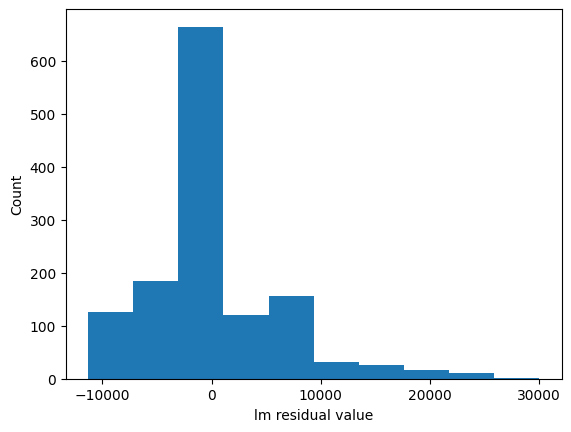

In [ ]:
plt.hist(resid)
plt.xlabel('lm residual value')
plt.ylabel('Count')

In [ ]:
np.std(resid)

6041.679651174453

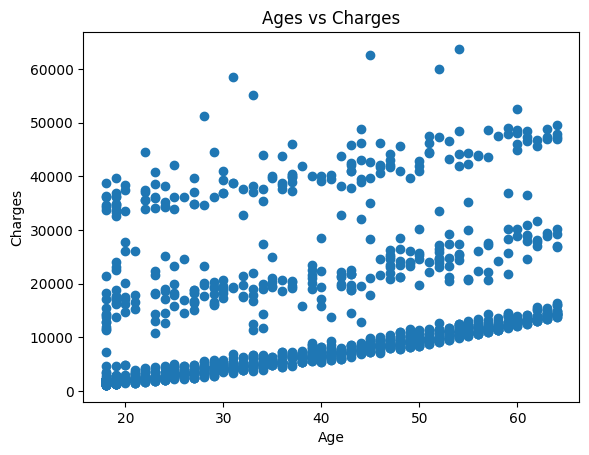

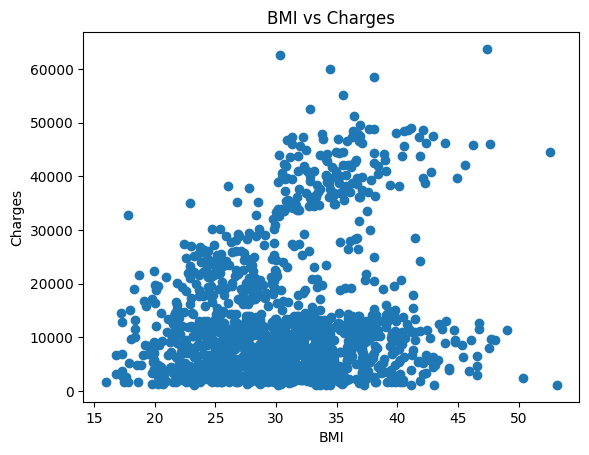

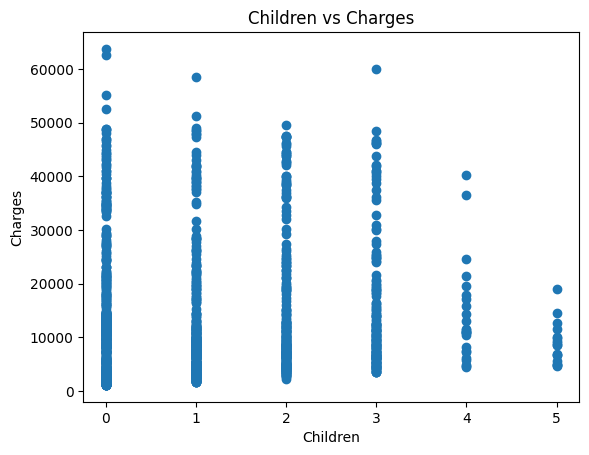

In [ ]:
plt.scatter(ins_df['age'], ins_df['charges'])
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Ages vs Charges")
plt.show()

plt.scatter(ins_df['bmi'], ins_df['charges'])
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("BMI vs Charges")
plt.show()

plt.scatter(ins_df['children'], ins_df['charges'])
plt.xlabel("Children")
plt.ylabel("Charges")
plt.title("Children vs Charges")
plt.show()

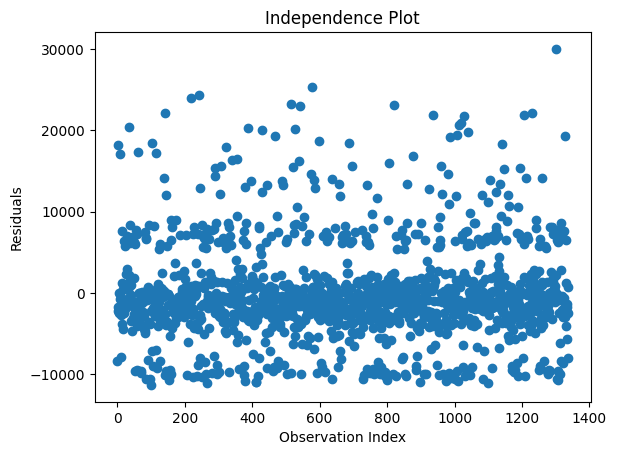

In [ ]:
plt.plot(resid, marker="o", linestyle="none")
plt.xlabel("Observation Index")
plt.ylabel("Residuals")
plt.title("Independence Plot")
plt.show()

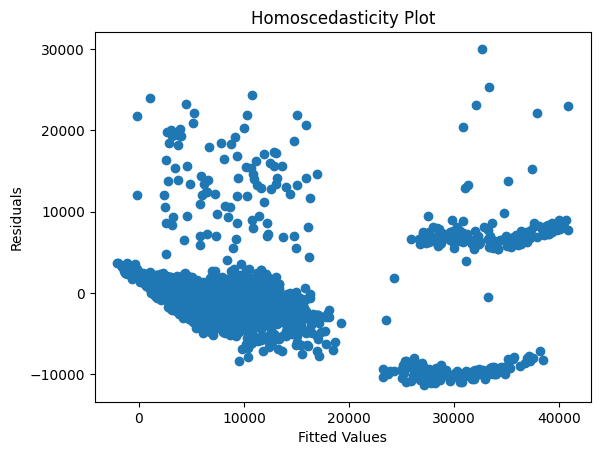

In [ ]:
plt.scatter(fit, resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Plot")
plt.show()

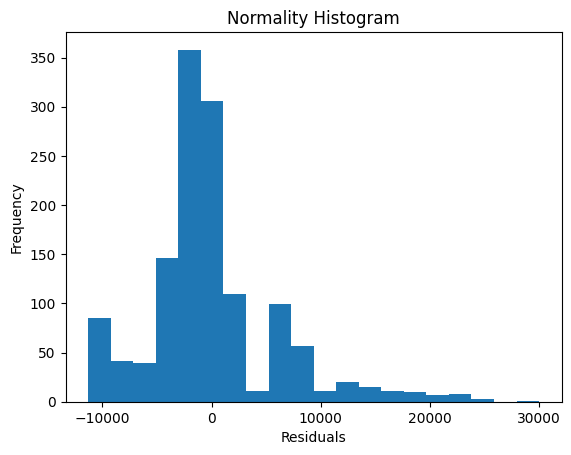

In [ ]:
plt.hist(resid, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Normality Histogram")
plt.show()